<a href="https://colab.research.google.com/github/pri2k/Data-Mining-Lab/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=61, stratify=y)

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
k_values = [1, 3, 5, 7, 9]
print("KNN Results:\n")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"K={k}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    print("-"*50)

KNN Results:

K=1
              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       0.44      0.47      0.45        15
   virginica       0.46      0.40      0.43        15

    accuracy                           0.62        45
   macro avg       0.61      0.62      0.62        45
weighted avg       0.61      0.62      0.62        45

--------------------------------------------------
K=3
              precision    recall  f1-score   support

      setosa       0.88      1.00      0.94        15
  versicolor       0.50      0.60      0.55        15
   virginica       0.60      0.40      0.48        15

    accuracy                           0.67        45
   macro avg       0.66      0.67      0.65        45
weighted avg       0.66      0.67      0.65        45

--------------------------------------------------
K=5
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
 

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Results:\n")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))


Decision Tree Results:

              precision    recall  f1-score   support

      setosa       0.78      0.93      0.85        15
  versicolor       0.41      0.47      0.44        15
   virginica       0.60      0.40      0.48        15

    accuracy                           0.60        45
   macro avg       0.60      0.60      0.59        45
weighted avg       0.60      0.60      0.59        45



In [6]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40)
    plt.title(title)
    plt.xlabel("Sepal length (standardized)")
    plt.ylabel("Sepal width (standardized)")
    plt.show()

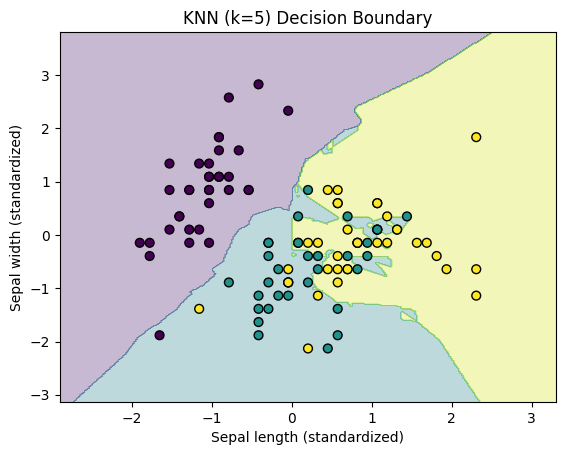

In [7]:
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train)
plot_decision_boundary(best_knn, X_train, y_train, "KNN (k=5) Decision Boundary")

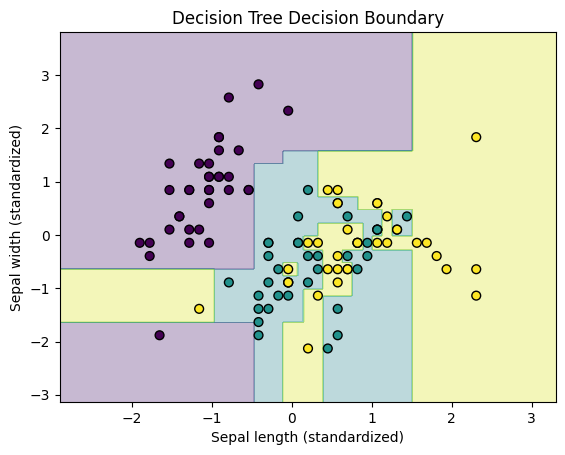

In [8]:
plot_decision_boundary(dt, X_train, y_train, "Decision Tree Decision Boundary")
